In [2]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns

Obtained data from CSET's Private-sector AI Relatred Activity tracker, https://github.com/georgetown-cset/parat
Also collected our own data for chatbot usage by finance firms in finance_chatbot_use.csv
This data is useful as a proxy for AI activity within the financial firms, since model training and fine-tuning, part of the research and development phase of AI models, utilise the most energy and are a good proxy for AI activity. Furthermore, most data in this area is not public, and it is difficult to obtain information about internal-facing AI models finance companies are using, hence we decide to look at only the customer-facing chatbot function.

In [3]:
df = pd.read_csv("./parat_data_20240624/core.csv")
df_chatbot = pd.read_csv("./finance_chatbot_use.csv")

In [15]:
df_chatbot.head()

,name,use_chatbot,customer_facing
0,Wells Fargo,Yes,Yes
1,Citi,No,No
2,Bank of America,Yes,Yes
3,Capital One,Yes,Yes
4,Morgan Stanley,Yes,No


In [16]:
df.head()

,Name,ID,Country,Website,Groups,Aggregated subsidiaries,Region,Stage,Sector,Description,...,Patents: AI applications and techniques: Language processing,Patents: AI applications and techniques: Measuring and testing,Patents: AI applications and techniques: Planning and scheduling,Patents: AI applications and techniques: Robotics,Patents: AI applications and techniques: Speech processing,Workforce: AI workers,Workforce: Tech Tier 1 workers,City,State/province,PARAT link
0,Accenture Plc,803,Ireland,https://www.accenture.com/,S&P 500,NaN,Europe,Mature,Software & IT Services,"Accenture is a professional services company, ...",...,33,13,129,0,23,13610,166212,Dublin,Dublin,https://parat.eto.tech/company/803-accenture-plc
1,Cognizant,806,United States,https://www.cognizant.com,S&P 500,NaN,North America,Mature,Software & IT Services,"Cognizant is a professional services company, ...",...,1,0,7,0,5,5226,130530,Teaneck,New Jersey,https://parat.eto.tech/company/806-cognizant
2,Amazon,23,United States,http://amazon.com,"S&P 500, Global Big Tech","Amazon Advertising, Amazon Web Services",North America,Mature,Retailers,Amazon is a global tech firm with a focus on e...,...,23,179,131,9,265,14164,128591,Seattle,Washington,https://parat.eto.tech/company/23-amazon
3,IBM,115,United States,http://www.ibm.com/,"S&P 500, Global Big Tech",NaN,North America,Mature,Software & IT Services,IBM is an IT technology and consulting firm pr...,...,386,296,828,4,471,6114,117521,Armonk,New York,https://parat.eto.tech/company/115-ibm
4,Microsoft,163,United States,http://www.microsoft.com,"S&P 500, Global Big Tech, GenAI Contenders",NaN,North America,Mature,Software & IT Services,Microsoft is a software corporation that devel...,...,214,61,550,0,365,5245,104414,Redmond,Washington,https://parat.eto.tech/company/163-microsoft


In [161]:
df.Sector.unique()

array(['Software & IT Services', 'Retailers',
       'Industrial & Commercial Services', 'Technology Equipment',
       'Unknown', 'Banking & Investment Services',
       'Telecommunications Services', 'Industrial Goods',
       'Financial Technology (Fintech) & Infrastructure',
       'Healthcare Services & Equipment', 'Automobiles & Auto Parts',
       'Consumer Goods Conglomerates', 'Food & Drug Retailing',
       'Pharmaceuticals & Medical Research', 'Cyclical Consumer Services',
       'Cyclical Consumer Products', 'Transportation',
       'Energy - Fossil Fuels', 'Food & Beverages',
       'Personal & Household Products & Services', 'Insurance',
       'Real Estate', 'Mineral Resources', 'Utilities', 'Chemicals',
       'Applied Resources'], dtype=object)

We will only consider the companies in the Banking & Investment Services sector.

In [8]:
X = df[df.Sector == 'Banking & Investment Services']

In [178]:
X.isnull().sum()

Name                              0
ID                                0
Country                           0
Website                           0
Groups                            9
                                 ..
Workforce: AI workers             0
Workforce: Tech Tier 1 workers    0
City                              0
State/province                    0
PARAT link                        0
Length: 61, dtype: int64

In [179]:
X.head()

,Name,ID,Country,Website,Groups,Aggregated subsidiaries,Region,Stage,Sector,Description,...,Patents: AI applications and techniques: Language processing,Patents: AI applications and techniques: Measuring and testing,Patents: AI applications and techniques: Planning and scheduling,Patents: AI applications and techniques: Robotics,Patents: AI applications and techniques: Speech processing,Workforce: AI workers,Workforce: Tech Tier 1 workers,City,State/province,PARAT link
13,Wells Fargo,807,United States,http://www.wellsfargo.com,S&P 500,NaN,North America,Mature,Banking & Investment Services,Wells Fargo & Company is a diversified financi...,...,0,4,40,0,10,3736,26094,San Francisco,California,https://parat.eto.tech/company/807-wells-fargo
17,Citi,809,United States,https://www.citigroup.com,S&P 500,NaN,North America,Mature,Banking & Investment Services,Citigroup is a financial services holding comp...,...,0,0,0,0,0,3158,22155,New York,New York,https://parat.eto.tech/company/809-citi
20,Bank of America,811,United States,http://www.bankofamerica.com,S&P 500,NaN,North America,Mature,Banking & Investment Services,Bank of America is a financial institution tha...,...,11,11,109,0,68,2498,20824,Charlotte,North Carolina,https://parat.eto.tech/company/811-bank-of-ame...
24,Capital One,371,United States,http://www.capitalone.com,S&P 500,NaN,North America,Mature,Banking & Investment Services,Capital One is a diversified banking company t...,...,17,28,168,0,77,3123,16480,Mclean,Virginia,https://parat.eto.tech/company/371-capital-one
25,Salesforce,219,United States,https://www.salesforce.com,S&P 500,NaN,North America,Mature,Banking & Investment Services,Salesforce is a cloud-based software company t...,...,25,3,64,0,36,797,15949,San Francisco,California,https://parat.eto.tech/company/219-salesforce


We delete some irrelevant rows

In [180]:
X.drop(['Name', 'ID', 'Country', 'Website', 'Groups', 'Aggregated subsidiaries',
       'Region', 'Stage', 'Sector', 'Description', 'Description source',
       'Description link', 'Description date', 'Publications: CV publications', 'Publications: NLP publications',
       'Publications: Robotics publications',
       'Publications: Total publications','Patents: AI use cases: Agriculture',
       'Patents: AI use cases: Computing in government',
       'Patents: AI use cases: Education', 'Patents: AI use cases: Energy',
       'Patents: AI use cases: Entertainment',
       'Patents: AI use cases: Industry and manufacturing',
       'Patents: AI use cases: Life sciences',
       'Patents: AI use cases: Military',
       'Patents: AI use cases: Nanotechnology',
       'Patents: AI use cases: Networking',
       'Patents: AI use cases: Personal devices and computing','PARAT link',
       ], axis=1, inplace=True)

/var/folders/_y/nvmjy5xs14b01kr1kt942tc80000gn/T/ipykernel_5158/1184871233.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
X.drop(['Publications: Recent AI publication growth','Patents: AI patents: recent growth',
       'Patents: AI use cases: Physical sciences and engineering',
       'Patents: AI use cases: Security',
       'Patents: AI use cases: Semiconductors',
       'Patents: AI use cases: Telecommunications',
       'Patents: AI use cases: Transportation','Patents: AI applications and techniques: Robotics',
       'Patents: AI applications and techniques: Speech processing',
       'City',
       'State/province'
       ], axis=1, inplace=True)

/var/folders/_y/nvmjy5xs14b01kr1kt942tc80000gn/T/ipykernel_5158/1004078433.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We will try to scale the data to conduct EDA

In [182]:
X = pd.get_dummies(X)


In [183]:
numer = X[['Publications: AI publications',
       'Publications: AI publication percentage',
       'Publications: AI publications in top conferences',
       'Publications: Citations to AI research', 'Patents: AI patents',
       'Patents: AI patent percentage', 'Patents: Granted AI patents',
       'Patents: Total patents', 'Patents: AI use cases: Banking and finance',
       'Patents: AI use cases: Business',
       'Patents: AI use cases: Document management and publishing',
       'Patents: AI applications and techniques: Analytics and algorithms',
       'Patents: AI applications and techniques: Computer vision',
       'Patents: AI applications and techniques: Control',
       'Patents: AI applications and techniques: Distributed AI',
       'Patents: AI applications and techniques: Knowledge representation',
       'Patents: AI applications and techniques: Language processing',
       'Patents: AI applications and techniques: Measuring and testing',
       'Patents: AI applications and techniques: Planning and scheduling',
       'Workforce: AI workers', 'Workforce: Tech Tier 1 workers']]

In [195]:
numer.head()

,Publications: AI publications,Publications: AI publication percentage,Publications: AI publications in top conferences,Publications: Citations to AI research,Patents: AI patents,Patents: AI patent percentage,Patents: Granted AI patents,Patents: Total patents,Patents: AI use cases: Banking and finance,Patents: AI use cases: Business,...,Patents: AI applications and techniques: Analytics and algorithms,Patents: AI applications and techniques: Computer vision,Patents: AI applications and techniques: Control,Patents: AI applications and techniques: Distributed AI,Patents: AI applications and techniques: Knowledge representation,Patents: AI applications and techniques: Language processing,Patents: AI applications and techniques: Measuring and testing,Patents: AI applications and techniques: Planning and scheduling,Workforce: AI workers,Workforce: Tech Tier 1 workers
0,0.208370,-0.026986,-0.194958,-0.136111,0.295156,-0.027948,0.423452,1.025350,0.894923,0.576640,...,0.462826,0.013773,2.114775,0.125683,0.587655,-0.291649,0.674458,0.967030,3.446652,3.454343
1,0.449056,-0.231257,-0.078490,-0.125775,-0.299546,-0.214684,-0.289991,-0.307141,-0.291693,-0.285145,...,-0.214241,-0.274210,-0.317216,-0.287276,-0.330913,-0.291649,-0.238044,-0.325153,2.804176,2.824525
2,-0.018159,-0.121265,-0.194958,-0.144525,4.252354,0.877005,4.632164,4.445811,3.030832,2.460882,...,5.728898,3.066398,4.060367,5.081191,4.754017,2.088585,2.271338,3.196046,2.070553,2.611708
3,0.307476,1.269353,-0.020255,-0.069286,4.293497,1.458760,3.948698,3.252025,5.641388,5.791171,...,2.945403,5.024685,4.303566,2.190478,3.113717,3.386895,6.149474,5.102016,2.765272,1.917133
4,6.239698,4.781252,6.647560,6.701443,2.198950,0.525079,2.234038,2.982013,-0.163904,1.379999,...,0.763744,2.893608,1.628376,3.429355,2.720045,5.117974,0.446333,1.742340,0.179805,1.832230


In [191]:
scaler = StandardScaler()

In [192]:
numer = pd.DataFrame(scaler.fit_transform(numer))

In [193]:
numer.columns = ['Publications: AI publications',
       'Publications: AI publication percentage',
       'Publications: AI publications in top conferences',
       'Publications: Citations to AI research', 'Patents: AI patents',
       'Patents: AI patent percentage', 'Patents: Granted AI patents',
       'Patents: Total patents', 'Patents: AI use cases: Banking and finance',
       'Patents: AI use cases: Business',
       'Patents: AI use cases: Document management and publishing',
       'Patents: AI applications and techniques: Analytics and algorithms',
       'Patents: AI applications and techniques: Computer vision',
       'Patents: AI applications and techniques: Control',
       'Patents: AI applications and techniques: Distributed AI',
       'Patents: AI applications and techniques: Knowledge representation',
       'Patents: AI applications and techniques: Language processing',
       'Patents: AI applications and techniques: Measuring and testing',
       'Patents: AI applications and techniques: Planning and scheduling',
       'Workforce: AI workers', 'Workforce: Tech Tier 1 workers']

In [196]:
X.head()

,Publications: AI publications,Publications: AI publication percentage,Publications: AI publications in top conferences,Publications: Citations to AI research,Patents: AI patents,Patents: AI patent percentage,Patents: Granted AI patents,Patents: Total patents,Patents: AI use cases: Banking and finance,Patents: AI use cases: Business,...,Patents: AI applications and techniques: Analytics and algorithms,Patents: AI applications and techniques: Computer vision,Patents: AI applications and techniques: Control,Patents: AI applications and techniques: Distributed AI,Patents: AI applications and techniques: Knowledge representation,Patents: AI applications and techniques: Language processing,Patents: AI applications and techniques: Measuring and testing,Patents: AI applications and techniques: Planning and scheduling,Workforce: AI workers,Workforce: Tech Tier 1 workers
13,37,7.4,0,273,163,10.9,122,1489,65,60,...,10,5,10,1,28,0,4,40,3736,26094
17,54,4.8,4,359,4,8.3,3,48,0,1,...,1,0,0,0,0,0,0,0,3158,22155
20,21,6.2,0,203,1221,23.5,824,5188,182,189,...,80,58,18,13,155,11,11,109,2498,20824
24,44,23.9,6,829,1232,31.6,710,3897,325,417,...,43,92,19,6,105,17,28,168,3123,16480
25,463,68.6,235,57163,672,18.6,424,3605,7,115,...,14,55,8,9,93,25,3,64,797,15949


We decide to carry out KMeans clustering for visualisation

In [174]:
kmeans = KMeans(n_clusters=3)


In [131]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [132]:
clusters = kmeans.predict(X)

In [133]:
#Add the cluster vector to our DataFrame, X
X["Cluster"] = clusters

In [134]:
#plotX is a DataFrame values from X
plotX = pd.DataFrame(np.array(X))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns

In [135]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [136]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [137]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [138]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')


In [139]:
plotX["dummy"] = 0

In [140]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [141]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

In [142]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]
title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [143]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)

iplot(fig)

In [145]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

We will now use TSNE to visualise instead

In [146]:
#plotX will hold the values we wish to plot
plotX = pd.DataFrame(np.array(X))
plotX.columns = X.columns

In [147]:
perplexity = 8


In [148]:
#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)

In [149]:
#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [150]:
TCs_1d.columns = ["TC1_1d"]

PCs_1d.columns = ["PC1_1d"]

#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [151]:
plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')


In [152]:
plotX["dummy"] = 0

In [153]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [154]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [155]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [156]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["TC1_3d"],
                    y = cluster2["TC2_3d"],
                    z = cluster2["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)


We observe a heatmap of the correlations between companies and the various indicies representing AI activity, we find that index 4, Salesforce, has a high correlation with most of the indicators

<Axes: >

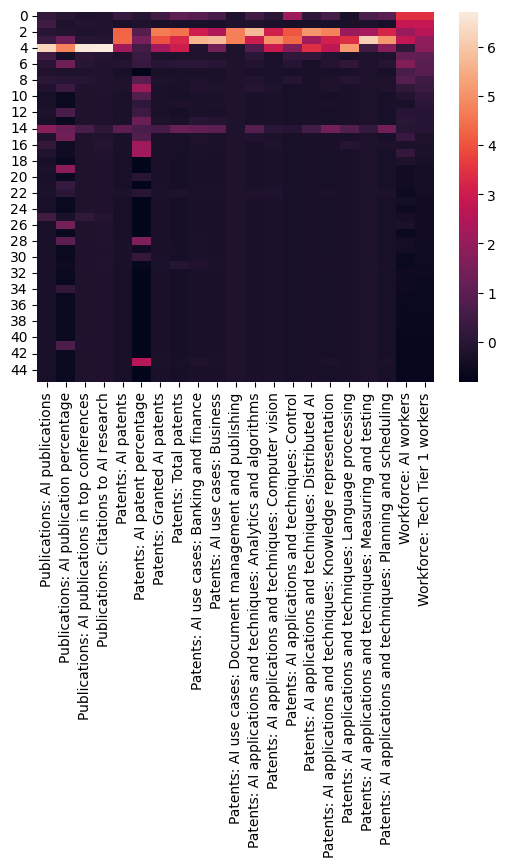

In [197]:
sns.heatmap(numer)

In [19]:
X.head(5)

,Name,ID,Country,Website,Groups,Aggregated subsidiaries,Region,Stage,Sector,Description,...,Patents: AI applications and techniques: Language processing,Patents: AI applications and techniques: Measuring and testing,Patents: AI applications and techniques: Planning and scheduling,Patents: AI applications and techniques: Robotics,Patents: AI applications and techniques: Speech processing,Workforce: AI workers,Workforce: Tech Tier 1 workers,City,State/province,PARAT link
80,Vanguard,743,United States,https://www.vanguard.com/,NaN,NaN,North America,Mature,Banking & Investment Services,Check is a client-owned investment company tha...,...,0,0,0,0,0,633,4443,Valley Forge,Pennsylvania,https://parat.eto.tech/company/743-vanguard
33,Morgan Stanley,585,United States,http://www.morganstanley.com,S&P 500,NaN,North America,Mature,Banking & Investment Services,Morgan Stanley is a financial services company...,...,0,0,4,0,0,1632,10943,New York,New York,https://parat.eto.tech/company/585-morgan-stanley
89,J.P. Morgan,518,United States,https://www.jpmorgan.com/,S&P 500,First Republic Bank,North America,Mature,Banking & Investment Services,JP Morgan is a financial services company that...,...,5,2,53,0,8,613,4009,New York,New York,https://parat.eto.tech/company/518-j-p-morgan
53,Goldman Sachs,471,United States,http://www.goldmansachs.com/,S&P 500,NaN,North America,Mature,Banking & Investment Services,Goldman Sachs is a multinational financial ser...,...,1,0,3,0,0,1407,7218,New York,New York,https://parat.eto.tech/company/471-goldman-sachs
25,Salesforce,219,United States,https://www.salesforce.com,S&P 500,NaN,North America,Mature,Banking & Investment Services,Salesforce is a cloud-based software company t...,...,25,3,64,0,36,797,15949,San Francisco,California,https://parat.eto.tech/company/219-salesforce


We now want to see which firms have the largest recent AI publication growth, to see which firms are making an effort to increase their AI capabilities

In [12]:

X.sort_values(by = ['Publications: Recent AI publication growth'], ascending = False, inplace = True)

/var/folders/_y/nvmjy5xs14b01kr1kt942tc80000gn/T/ipykernel_15049/3201418914.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
X.head()

,Name,ID,Country,Website,Groups,Aggregated subsidiaries,Region,Stage,Sector,Description,...,Patents: AI applications and techniques: Language processing,Patents: AI applications and techniques: Measuring and testing,Patents: AI applications and techniques: Planning and scheduling,Patents: AI applications and techniques: Robotics,Patents: AI applications and techniques: Speech processing,Workforce: AI workers,Workforce: Tech Tier 1 workers,City,State/province,PARAT link
80,Vanguard,743,United States,https://www.vanguard.com/,NaN,NaN,North America,Mature,Banking & Investment Services,Check is a client-owned investment company tha...,...,0,0,0,0,0,633,4443,Valley Forge,Pennsylvania,https://parat.eto.tech/company/743-vanguard
33,Morgan Stanley,585,United States,http://www.morganstanley.com,S&P 500,NaN,North America,Mature,Banking & Investment Services,Morgan Stanley is a financial services company...,...,0,0,4,0,0,1632,10943,New York,New York,https://parat.eto.tech/company/585-morgan-stanley
89,J.P. Morgan,518,United States,https://www.jpmorgan.com/,S&P 500,First Republic Bank,North America,Mature,Banking & Investment Services,JP Morgan is a financial services company that...,...,5,2,53,0,8,613,4009,New York,New York,https://parat.eto.tech/company/518-j-p-morgan
53,Goldman Sachs,471,United States,http://www.goldmansachs.com/,S&P 500,NaN,North America,Mature,Banking & Investment Services,Goldman Sachs is a multinational financial ser...,...,1,0,3,0,0,1407,7218,New York,New York,https://parat.eto.tech/company/471-goldman-sachs
25,Salesforce,219,United States,https://www.salesforce.com,S&P 500,NaN,North America,Mature,Banking & Investment Services,Salesforce is a cloud-based software company t...,...,25,3,64,0,36,797,15949,San Francisco,California,https://parat.eto.tech/company/219-salesforce
